In [10]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.utils import resample
import matplotlib.pyplot as plt
# Define a function to create the pipeline and fit the data
def fit_svr_with_bootstrap(X, y):
    # Create a pipeline to normalize the data and fit the SVR model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
    
    # Bootstrap 1000 models
    predictions = []
    for _ in range(1000):
        # Resample the data
        X_resampled, y_resampled = resample(X, y)
        
        # Fit the model
        pipeline.fit(X_resampled, y_resampled)
        
        # Predict on the original data
        y_pred = pipeline.predict(X)
        predictions.append(y_pred)
    
    # Calculate the 95% confidence interval for all predictions
    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)
    median_pred = np.median(predictions, axis=0)
    
    return lower_bound, upper_bound, median_pred

# Import the files L25, L45, L75
file_paths = ['L25.csv'#, 'L45.csv', 'L75.csv'
              ]
data_frames = []
for file_path in file_paths:
    data_frames.append(pd.read_csv(file_path))

# Iterate over the data frames and perform the required steps
for i, df in enumerate(data_frames):
    X = df[['x']]  # Replace 'feature1' and 'feature2' with the actual column names
    y = df['y']  # Replace 'target' with the actual target column name
    
    # Fit SVR with bootstrap and get the confidence interval
    lower_bound, upper_bound, median_pred = fit_svr_with_bootstrap(X, y)
    
    


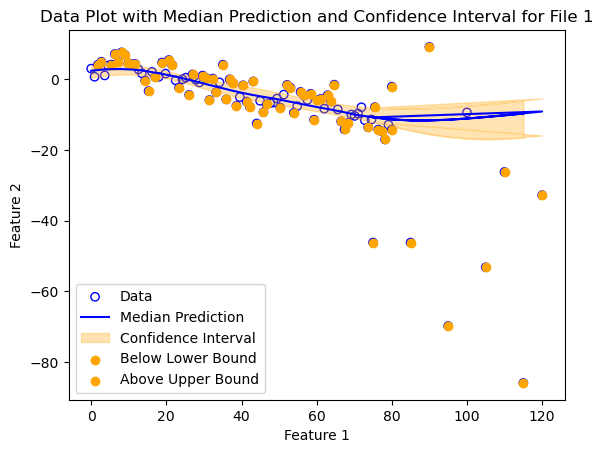

In [13]:
plt.scatter(X, y, facecolors='none', edgecolors='blue', label='Data')
plt.plot(X, median_pred, color='blue', label='Median Prediction')
plt.fill_between(X.squeeze(), lower_bound.squeeze(), upper_bound.squeeze(), color='orange', alpha=0.3, label='Confidence Interval')

# Plot points below the lower bound
below_lower_bound = y < lower_bound
plt.scatter(X[below_lower_bound], y[below_lower_bound], color='orange', label='Below Lower Bound')

# Plot points above the upper bound
above_upper_bound = y > upper_bound
plt.scatter(X[above_upper_bound], y[above_upper_bound], color='orange', label='Above Upper Bound')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Data Plot with Median Prediction and Confidence Interval for File {i+1}')
plt.legend()
plt.show()



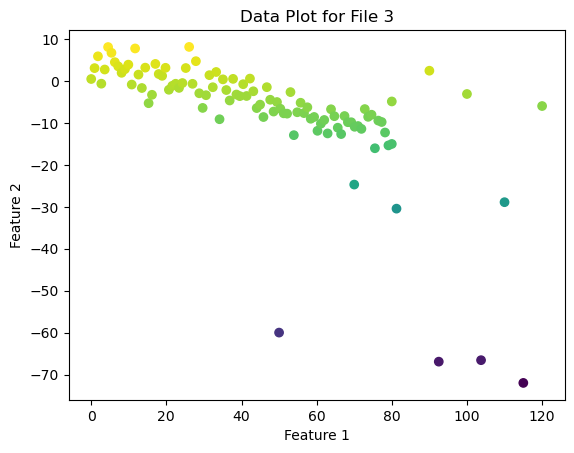

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
file_paths = ['L25.csv', 'L45.csv', 'L75.csv']
data_frames = []
for file_path in file_paths:
    data_frames.append(pd.read_csv(file_path))
for i, df in enumerate(data_frames):
    X = df[['x']]  # Replace 'feature1' and 'feature2' with the actual column names
    y = df['y']
plt.scatter(X, y, c=y, cmap='viridis')
#plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Data Plot for File {i+1}')
plt.show()